<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/new_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [2]:
df = pd.read_csv('new_rob.csv')
df.head()


,crime code,Location,occ_day,occ_month,occ_week,weapons,Year,light
0,11034701,RESIDENCE,4,8,Sunday,shotguns,2014,day
1,11162428,APARTMENT,10,8,Monday,shotguns,2014,day
2,11175304,SIDEWALK,12,8,Tuesday,shotguns,2014,day
3,11227287,RESIDENCE,22,6,Wednesday,shotguns,2014,day
4,11227583,OTHER,8,6,Thursday,shotguns,2014,day


In [3]:
df.shape


(100232, 8)

In [5]:
df['weapons'].value_counts()


rifles      32850
poison      19948
ironrods    17055
shotguns    15721
knife       14658
Name: weapons, dtype: int64

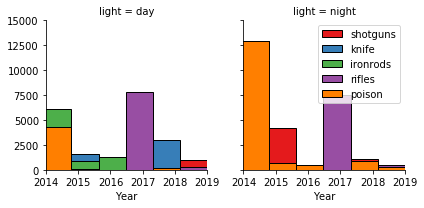

In [102]:
import seaborn as sns

bins = np.linspace(df.Year.min(), df.Year.max(), 20)
g = sns.FacetGrid(df, col="light", hue="weapons", palette="Set1",col_wrap=2,xlim=(2014,2019),ylim=(0,15000))
g.map(plt.hist,'Year', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [103]:
df.groupby(['Location'])['weapons'].value_counts(normalize=True)


Location            weapons 
ABANDONED BUILDING  rifles      0.253846
                    poison      0.230769
                    shotguns    0.200000
                    knife       0.176923
                    ironrods    0.138462
                                  ...   
YARD                rifles      0.500000
                    shotguns    0.333333
                    knife       0.166667
YMCA                knife       0.500000
                    rifles      0.500000
Name: weapons, Length: 511, dtype: float64

In [104]:
df['light'].replace(to_replace=['day','night'], value=[0,1],inplace=True)
df.head()


,crime code,Location,occ_day,occ_month,occ_week,weapons,Year,light
0,11034701,RESIDENCE,4,8,Sunday,shotguns,2014,0
1,11162428,APARTMENT,10,8,Monday,shotguns,2014,0
2,11175304,SIDEWALK,12,8,Tuesday,shotguns,2014,0
3,11227287,RESIDENCE,22,6,Wednesday,shotguns,2014,0
4,11227583,OTHER,8,6,Thursday,shotguns,2014,0


In [105]:
df[['Year','Location','occ_week','occ_day','occ_month','light']].head()

,Year,Location,occ_week,occ_day,occ_month,light
0,2014,RESIDENCE,Sunday,4,8,0
1,2014,APARTMENT,Monday,10,8,0
2,2014,SIDEWALK,Tuesday,12,8,0
3,2014,RESIDENCE,Wednesday,22,6,0
4,2014,OTHER,Thursday,8,6,0


In [106]:
Feature = df[['Year','light','occ_day']]
Feature = pd.concat([Feature,pd.get_dummies(df['Location'])], axis=1)
Feature.head()


,Year,light,occ_day,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO,AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,BASEMENT,BOAT/WATERCRAFT,BOWLING ALLEY,BRIDGE,CAR WASH,CEMETARY,CHA APARTMENT,CHA BREEZEWAY,CHA ELEVATOR,CHA GROUNDS,CHA HALLWAY,...,OTHER RAILROAD PROP / TRAIN DEPOT,PARK PROPERTY,PARKING LOT,PARKING LOT/GARAGE(NON.RESID.),PAWN SHOP,POLICE FACILITY/VEH PARKING LOT,POOL ROOM,PORCH,RESIDENCE,RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,RETAIL STORE,SAVINGS AND LOAN,SCHOOL YARD,"SCHOOL, PRIVATE, BUILDING","SCHOOL, PRIVATE, GROUNDS","SCHOOL, PUBLIC, BUILDING","SCHOOL, PUBLIC, GROUNDS",SEWER,SIDEWALK,SMALL RETAIL STORE,SPORTS ARENA/STADIUM,STAIRWELL,STREET,TAVERN,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT,VACANT LOT/LAND,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,WAREHOUSE,WOODED AREA,YARD,YMCA
0,2014,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2014,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
X = Feature
X[0:5]

,Year,light,occ_day,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO,AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,BASEMENT,BOAT/WATERCRAFT,BOWLING ALLEY,BRIDGE,CAR WASH,CEMETARY,CHA APARTMENT,CHA BREEZEWAY,CHA ELEVATOR,CHA GROUNDS,CHA HALLWAY,...,OTHER RAILROAD PROP / TRAIN DEPOT,PARK PROPERTY,PARKING LOT,PARKING LOT/GARAGE(NON.RESID.),PAWN SHOP,POLICE FACILITY/VEH PARKING LOT,POOL ROOM,PORCH,RESIDENCE,RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,RETAIL STORE,SAVINGS AND LOAN,SCHOOL YARD,"SCHOOL, PRIVATE, BUILDING","SCHOOL, PRIVATE, GROUNDS","SCHOOL, PUBLIC, BUILDING","SCHOOL, PUBLIC, GROUNDS",SEWER,SIDEWALK,SMALL RETAIL STORE,SPORTS ARENA/STADIUM,STAIRWELL,STREET,TAVERN,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT,VACANT LOT/LAND,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,WAREHOUSE,WOODED AREA,YARD,YMCA
0,2014,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2014,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
y = pd.get_dummies(df['weapons'])['rifles'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [110]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-8.11732446e-01, -1.12155441e+00, -1.04192479e+00,
        -3.60371385e-02, -1.30244111e-02, -1.18192836e-02,
        -8.93427112e-03, -7.06305579e-03, -6.31735763e-03,
        -8.93427112e-03, -1.89550991e-02, -1.04765183e-02,
        -4.46700185e-03, -9.47627282e-03, -2.04744600e-02,
        -3.15863155e-03, -1.22341818e-02, -5.41459915e-02,
        -1.29691369e-01, -9.47627282e-03, -3.11259082e-01,
        -1.75891486e-02, -3.76659415e-02, -2.71814761e-02,
        -2.75466195e-02, -7.06305579e-03, -6.04554461e-02,
        -7.54927092e-02, -3.22284114e-02, -5.47096490e-03,
        -5.47096490e-03, -1.51499275e-02, -6.31735763e-03,
        -2.21157170e-02, -5.47096490e-03, -9.95718709e-02,
        -3.15863155e-03, -3.15863155e-03, -5.47096490e-03,
        -7.73722856e-03, -7.56929504e-02, -3.15863155e-03,
        -1.13193374e-01, -3.15863155e-03, -5.47096490e-03,
        -3.15863155e-03, -4.10966662e-02, -3.40390358e-02,
        -3.15863155e-03, -3.15863155e-03, -1.22341818e-0

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


In [112]:
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dtmodel.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [113]:
y_pred=dtmodel.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy


0.7261541252229646